In [3]:
#Source: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?resource=download
from sklearnex import patch_sklearn                         #intel 加速補丁
patch_sklearn()                                             #这个补丁之后的所有import语句导入的来自sklearn的算法，都会优先导入Scikit-Learn优化版本
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 500)

In [4]:
players_22=pd.read_csv("players_22.csv",low_memory=False)
players_22=players_22.drop(columns=['release_clause_eur','club_contract_valid_until','club_joined','nation_jersey_number','nation_position','nation_team_id','club_loaned_from','nation_jersey_number','body_type','real_face','player_tags','player_traits','long_name','sofifa_id','player_url','player_face_url', 'club_logo_url','club_flag_url', 'nation_logo_url', 'nation_flag_url'])
display(players_22)
display(players_22.describe(include="all"))
miss_index=players_22.isnull().index                                 #gk沒有pace shooting passing dribbling defending physic 有 goalkeeping_speed
print(players_22.isnull().sum())

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,52,Argentina,Left,4,4,5,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,37,Poland,Right,4,4,5,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,38,Portugal,Right,4,5,5,High/Low,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,54,Brazil,Right,5,5,5,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,7,Belgium,Right,5,4,4,High/High,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,112541.0,Wuhan FC,Chinese Super League,1.0,SUB,36.0,155,China PR,Right,3,2,1,Medium/Medium,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN,44+2,44+2,44+2,46,45,45,45,46,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
19235,C. Porter,C

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
count,19239,19239,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239,19239.000000,19239.000000,19178.000000,19178,19178,19178.000000,19178,19178.000000,19239.000000,19239,19239,19239.000000,19239.000000,19239.000000,19239,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239,19239
unique,18145,674,NaN,NaN,NaN,NaN,NaN,6312,NaN,NaN,NaN,701,55,NaN,29,NaN,NaN,163,2,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228,228,228,138,132,132,132,138,252,252,252,235,212,212,212,235,196,239,239,239,196,193,259,259,259,193,115
top,J. Rodríguez,CB,NaN,NaN,NaN,NaN,NaN,1992-02-29,NaN,NaN,NaN,Paris Saint-Germain,USA Major League Soccer,NaN,SUB,NaN,NaN,England,Right,NaN,NaN,NaN,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60+2,60+2,60+2,60,63,63,63,60,62+2,62+2,62+2,61+2,58+2,58+2,58+2,61+2,61+2,61+2,61+2,61+2,61+2,62+2,64+2,64+2,64+2,62+2,16+2
freq,13,2423,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,33,771,NaN,8299,NaN,NaN,1719,14674,NaN,NaN,NaN,10015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733,733,733,773,823,823,823,773,792,792,792,776,803,803,803,776,750,678,678,678,750,767,540,540,540,767,3851
mean,NaN,NaN,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,NaN,181.299704,74.943032,50580.498123,NaN,NaN,1.354364,NaN,20.945250,58.602682,NaN,NaN,2.946151,2.352461,1.094184,NaN,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.880232,6.086213,7.613700e+06,19470.176

short_name           0
player_positions     0
overall              0
potential            0
value_eur           74
                    ..
lcb                  0
cb                   0
rcb                  0
rb                   0
gk                   0
Length: 91, dtype: int64


In [5]:
for i in range(0,19239,1):
    for j in range(64,91,1):
        original=players_22.iloc[i,j]
        players_22.iloc[i,j]=eval(original)
best_position=players_22.iloc[:,64:91].astype('float64').idxmax(axis=1,skipna=True).to_frame(name="best_position")
players_22=pd.concat([players_22,best_position],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
position_label=le.fit_transform(players_22["best_position"])
df=pd.DataFrame(position_label,columns=["position_label"])
players_22=pd.concat([players_22,df],axis=1)
display(players_22)
display(players_22)


,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,best_position,position_label
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,52,Argentina,Left,4,4,5,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22,lf,6
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,37,Poland,Right,4,4,5,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,92,92,92,85,88,88,88,85,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22,ls,8
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,38,Portugal,Right,4,5,5,High/Low,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,91,91,91,88,89,89,89,88,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23,ls,8
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,54,Brazil,Right,5,5,5,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,86,86,86,90,88,88,88,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23,lam,1
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,7,Belgium,Right,5,4,4,High/High,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,86,86,86,88,87,87,87,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,lam,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,112541.0,Wuhan FC,Chinese Super League,1.0,SUB,36.0,155,China PR,Right,3,2,1,Medium/Medium,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN,46,46,46,46,45,45,45,46,48,48,48,49,48,48,48,49,50,48,48,48,50,50,48,48,48,50,17,lwb,10
19235,C. Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,445.0,Derry City,Rep. Ireland Airtricity League,1.0,RES,27.0,25,Republic of Ireland,Right,3,2,1,Medium/Medium,59.0,39.0,50.0,46.0,41.0,51.0,54,

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,best_position,position_label
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,52,Argentina,Left,4,4,5,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22,lf,6
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,37,Poland,Right,4,4,5,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,92,92,92,85,88,88,88,85,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22,ls,8
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,38,Portugal,Right,4,5,5,High/Low,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,91,91,91,88,89,89,89,88,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23,ls,8
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,54,Brazil,Right,5,5,5,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,86,86,86,90,88,88,88,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23,lam,1
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,7,Belgium,Right,5,4,4,High/High,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,86,86,86,88,87,87,87,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,lam,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,112541.0,Wuhan FC,Chinese Super League,1.0,SUB,36.0,155,China PR,Right,3,2,1,Medium/Medium,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN,46,46,46,46,45,45,45,46,48,48,48,49,48,48,48,49,50,48,48,48,50,50,48,48,48,50,17,lwb,10
19235,C. Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,445.0,Derry City,Rep. Ireland Airtricity League,1.0,RES,27.0,25,Republic of Ireland,Right,3,2,1,Medium/Medium,59.0,39.0,50.0,46.0,41.0,51.0,54,

dict_keys(['lf', 'ls', 'lam', 'gk', 'ldm', 'lcb', 'lcm', 'lwb', 'lm', 'lw', 'lb'])
dict_values([11, 3601, 2708, 2132, 1198, 3236, 818, 2393, 2014, 720, 408])


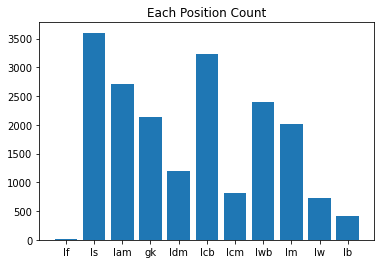

[70.27272727272727, 66.0119411274646, 66.17872968980798, 64.41979362101313, 67.30884808013356, 65.37175525339926, 68.41931540342298, 66.30798161303802, 63.9682224428997, 68.49722222222222, 62.213235294117645]
[176.9090909090909, 182.0508192168842, 176.70937961595274, 188.53377110694183, 181.91736227045075, 186.42181705809642, 179.979217603912, 178.36815712494777, 176.6588877855015, 174.8375, 179.1691176470588]
[37845.454545454544, 9864.351336302896, 11493.425925925925, 6349.952919020716, 10325.818639798488, 8291.813953488372, 14367.80905752754, 8411.672254819781, 6094.248007968127, 10698.398328690808, 4462.56157635468]
[72.0909090909091, 76.2057761732852, 70.41543574593796, 81.69746716697937, 75.8347245409015, 79.25092707045735, 73.50733496332518, 72.50438779774342, 70.24925521350546, 69.33333333333333, 72.09558823529412]


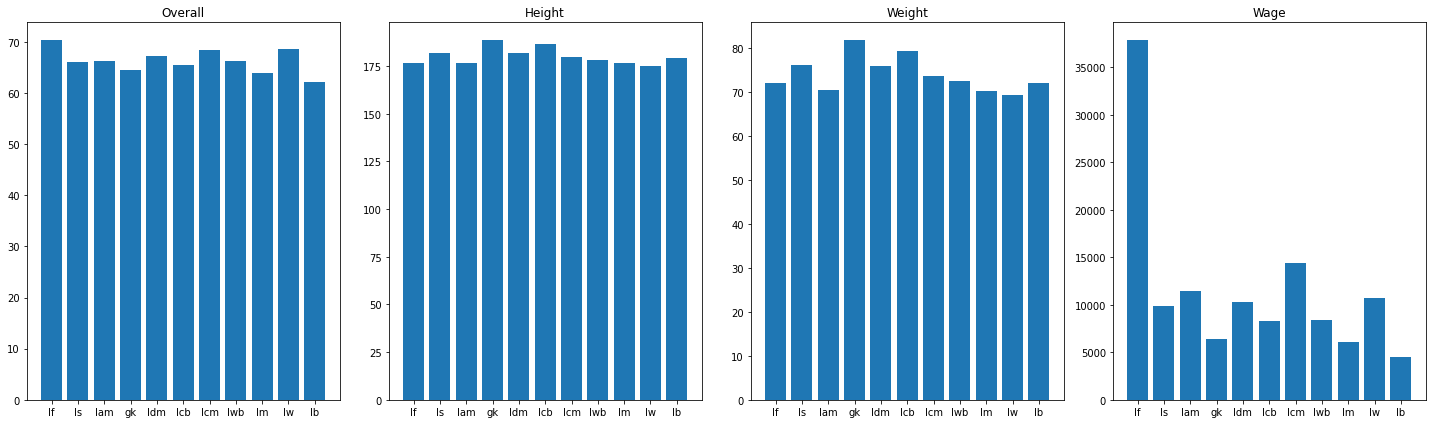

In [6]:
ls=players_22[players_22['best_position']=='ls']
lcb	=players_22[players_22['best_position']=='lcb']
lam=players_22[players_22['best_position']=='lam']
lwb	=players_22[players_22['best_position']=='lwb']
gk	=players_22[players_22['best_position']=='gk']
lm	=players_22[players_22['best_position']=='lm']
ldm	=players_22[players_22['best_position']=='ldm']
lcm	=players_22[players_22['best_position']=='lcm']
lw=players_22[players_22['best_position']=='lw']
lf=players_22[players_22['best_position']=='lf']
lb	=players_22[players_22['best_position']=='lb']
position=[lf, ls, lam, gk, ldm, lcb, lcm, lwb, lm, lw, lb]
label=['lf', 'ls', 'lam', 'gk', 'ldm', 'lcb', 'lcm', 'lwb', 'lm', 'lw', 'lb']
'''
st=players_22[players_22['best_position']=='st']
rs=players_22[players_22['best_position']=='rs']
cf=players_22[players_22['best_position']=='cf']
rf=players_22[players_22['best_position']=='rf']
rw=players_22[players_22['best_position']=='rw']
cam=players_22[players_22['best_position']=='cam']
ram	=players_22[players_22['best_position']=='ram']
cm	=players_22[players_22['best_position']=='cm']
rcm	=players_22[players_22['best_position']=='rcm']
rm	=players_22[players_22['best_position']=='rm']
cdm	=players_22[players_22['best_position']=='cdm']
rdm	=players_22[players_22['best_position']=='rdm']
rwb	=players_22[players_22['best_position']=='rwb']
cb	=players_22[players_22['best_position']=='cb']
rcb	=players_22[players_22['best_position']=='rcb']
rb	=players_22[players_22['best_position']=='rb']
'''
count=Counter(players_22['best_position'])
print(count.keys())
print(count.values())
plt.figure()
plt.title("Each Position Count")
plt.bar(count.keys(),count.values())
plt.show()
avg_height=[]
avg_weight=[]
avg_wage=[]
avg_overall=[]
for i in position:
    avg_weight.append(i['weight_kg'].mean())
    avg_height.append(i['height_cm'].mean())
    avg_wage.append(i['wage_eur'].mean())
    avg_overall.append(i["overall"].mean())
print(avg_overall)
print(avg_height)
print(avg_wage)
print(avg_weight)
fig=plt.figure(figsize=(20,6))
fig.add_subplot(141)
plt.title("Overall")
plt.bar(label,avg_overall)
fig.add_subplot(142)
plt.title("Height")
plt.bar(label,avg_height)
fig.add_subplot(143)
plt.title("Weight")
plt.bar(label,avg_weight)
fig.add_subplot(144)
plt.title("Wage")
plt.bar(label,avg_wage)
plt.tight_layout()
plt.show()



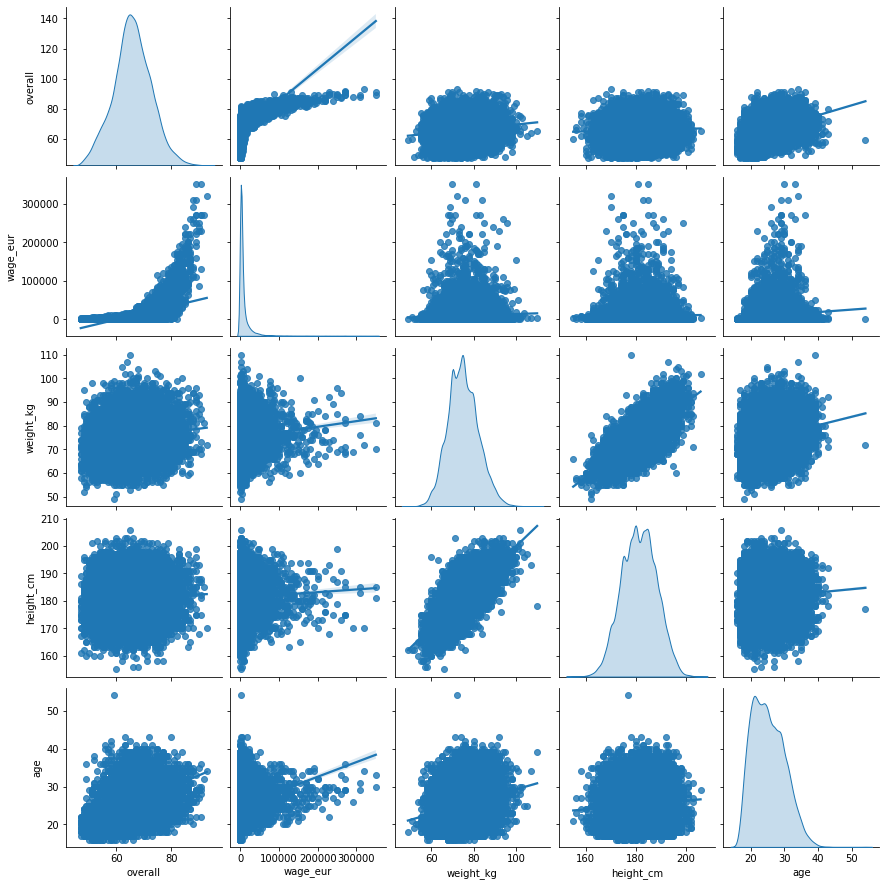

In [7]:
label=["overall",'wage_eur','weight_kg','height_cm','age']
sns.pairplot(players_22[label],kind='reg',diag_kind='kde')


<AxesSubplot:>

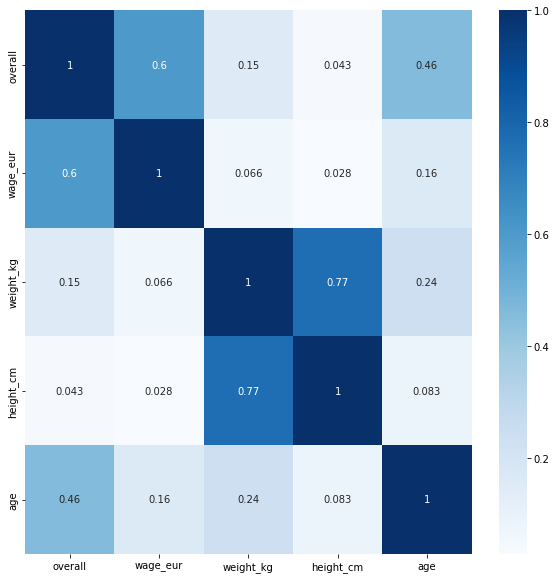

In [8]:
cor=players_22[label].corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,vmax=1,cmap="Blues")

,wage_eur,position_label,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,320000.0,6,93,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,270000.0,8,92,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,270000.0,8,91,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,270000.0,1,91,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,350000.0,1,91,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,1000.0,10,47,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN
19235,500.0,7,47,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN
19236,500.0,7,47,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN
19237,500.0,8,47,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN


wage_eur                       0
position_label                 0
overall                        0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_

,wage_eur,position_label,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,320000.0,6,93,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0
1,270000.0,8,92,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0
2,270000.0,8,91,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0
3,270000.0,1,91,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0
4,350000.0,1,91,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,1000.0,10,47,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,0.0
19235,500.0,7,47,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,0.0
19236,500.0,7,47,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,0.0
19237,500.0,8,47,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,0.0


Overall:  Index(['wage_eur', 'overall', 'attacking_crossing', 'attacking_short_passing',
       'skill_curve', 'skill_long_passing', 'skill_ball_control',
       'movement_reactions', 'power_shot_power', 'power_long_shots',
       'mentality_aggression', 'mentality_vision', 'mentality_composure'],
      dtype='object')
Position:  Index(['position_label', 'pace', 'shooting', 'passing', 'dribbling', 'physic',
       'attacking_crossing', 'attacking_finishing', 'skill_dribbling',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'power_stamina', 'mentality_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'],
      dtype='object')
wage:  Index(['wage_eur', 'overall', 'shooting', 'passing', 'dribbling',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volle

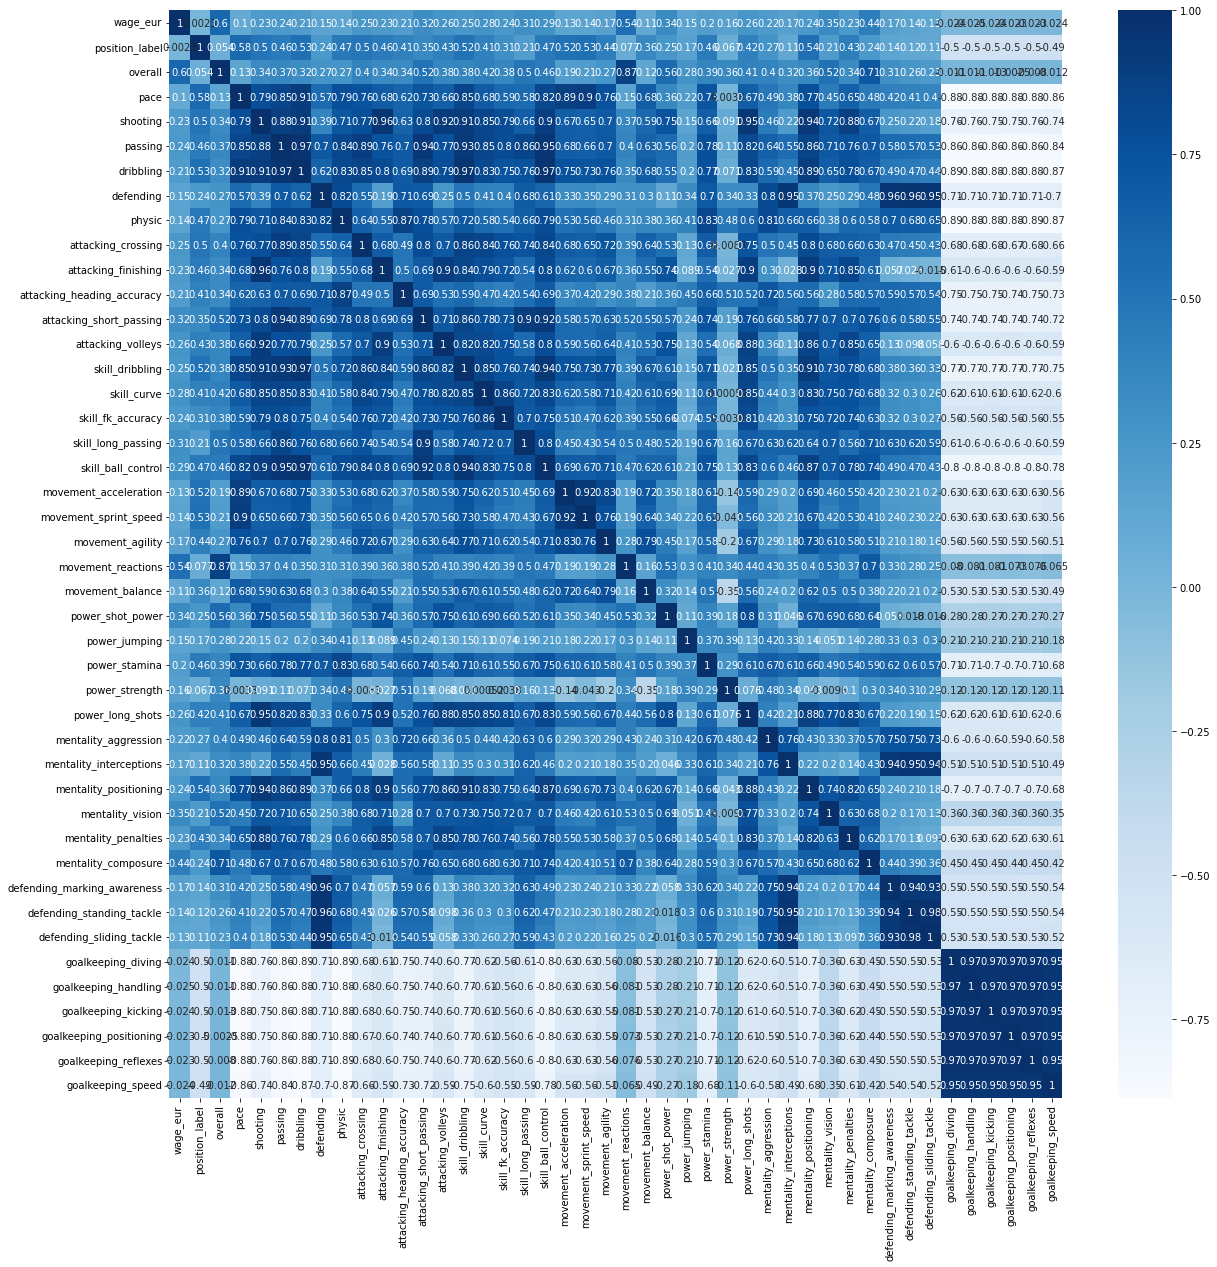

In [9]:
trait_label=['wage_eur','position_label','overall','pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',	"attacking_volleys","skill_dribbling",	"skill_curve",'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']
trait=players_22[trait_label]
display(trait)
trait=trait.fillna(0)
print(trait.isnull().sum())
display(trait)
trait_cor=trait.corr()

plt.figure(figsize=(20,20))
sns.heatmap(trait_cor,annot=True,vmax=1,cmap="Blues")
overall_corr=trait_cor.index[abs(trait_cor['overall'])>0.4]
position_corr=trait_cor.index[abs(trait_cor['position_label'])>0.45]
wage_corr=trait_cor.index[abs(trait_cor['wage_eur'])>0.2]
print("Overall: ",overall_corr)
print("Position: ",position_corr)
print("wage: ",wage_corr)


In [12]:
#position classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
index=['pace', 'shooting', 'passing', 'dribbling', 'physic',
       'attacking_crossing', 'attacking_finishing', 'skill_dribbling',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'power_stamina', 'mentality_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
para={"max_features":["log2","sqrt"],"n_estimators":range(100,1000,100),"criterion":["gini", "entropy", "log_loss"],"max_depth":range(1,100,5)}
y=players_22['position_label']
x=players_22[index].fillna(0)
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)
RFC=RandomForestClassifier(random_state=2023)
gridsearch=GridSearchCV(RFC,para,cv=5,verbose=1)
gridsearch.fit(X_train,y_train)
print(gridsearch.best_score_)
print(gridsearch.best_estimator_)
print(gridsearch.best_params_)
#print("Test score:",RFC.score(X_test,y_test))
#print("Train score:",RFC.score(X_train,y_train))

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


In [11]:
#wage regression
from sklearn.ensemble import RandomForestRegressor
index=['attacking_crossing', 'attacking_short_passing',
       'skill_curve', 'skill_long_passing', 'skill_ball_control',
       'movement_reactions', 'power_shot_power', 'power_long_shots',
       'mentality_aggression', 'mentality_vision', 'mentality_composure']
y=players_22['overall']
x=players_22[index]
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)
RFR=RandomForestRegressor(n_estimators=100)
RFR.fit(X_train,y_train)
print("Test score:",RFR.score(X_test,y_test))
print("Train score:",RFR.score(X_train,y_train))

Test score: 0.9063899645520102
Train score: 0.9867955212219418
